# test de validation

In [5]:
%matplotlib inline
import os
import json

os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [6]:
path = '/home/skit/formation/ml/datas/final'

In [7]:
def ocr_treatment(img_path):
	doc = DocumentFile.from_images(img_path)
	predictor = ocr_predictor('linknet_resnet18', pretrained=True, assume_straight_pages=False, preserve_aspect_ratio=True, det_bs=4, reco_bs=1024)
	result = predictor(doc)
	return result

def ocr_display(result):
	synthetic_pages = result.synthesize()
	plt.figure(figsize=(15, 15))
	plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()
	
	
def extract_text_blocks(json_data):
    text_blocks = []
    for page in json_data["pages"]:
        for block in page["blocks"]:
            text = ""
            for line in block["lines"]:
                for word in line["words"]:
                    text += word["value"] + " "
            text_blocks.append(text.strip())
    return text_blocks


def ocr_display_text(result):
	json_data = result.export()
	text_blocks = extract_text_blocks(json_data)
	for i, block in enumerate(text_blocks, start=1):
		print(f"Block {i}: {block}")
	
	
def save_json(result, file_name='result'):
	with open(file_name + '.json', 'w') as f:
		f.write(json.dumps(result.export()))
	
	
def save_txt(result, file_name='result'):
	with open(file_name + '.txt', 'w') as f:
		f.write(result.render())

In [39]:
# load list from 'bad_ocr.txt' file
with open('bad_ocr.txt', 'r') as f:
	bad_ocr = f.read().splitlines()
from random import randint

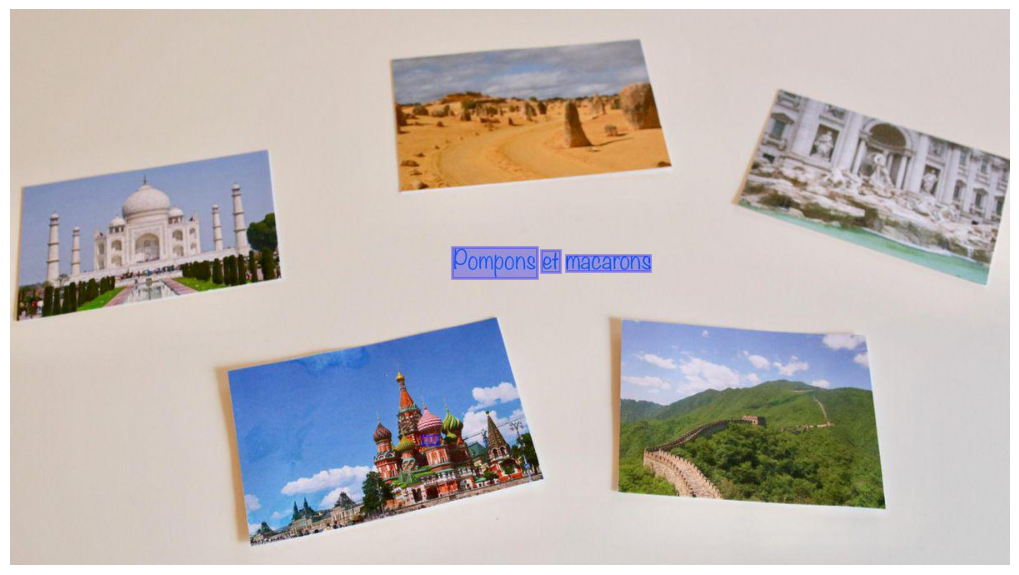

Block 1: Pompons et macarons
Block 2: 


In [41]:
img_path = os.path.join(path, bad_ocr[randint(0, len(bad_ocr) - 1)])
result = ocr_treatment(img_path)
result.show()
#ocr_display(result)
ocr_display_text(result)
save_txt(result)
#save_json(result)

In [5]:
model = 'linknet_resnet50'

In [7]:
totreat = []

with open('to_ocr.txt', 'r') as f:
	files = f.read().splitlines()
	
import os
treated_files = [f for f in os.listdir(model) if os.path.isfile(os.path.join(model, f))]

for file in files:
	temp = file + '.txt'
	if temp not in treated_files:
		totreat.append(file)

In [ ]:
from multiprocessing import Pool

def treat(file):
	print(file)
	img_path = os.path.join(path, file)
	result = ocr_treatment(img_path)
	save_txt(result, model + '/' + file)

with Pool(4) as p:
    print(p.map(treat, totreat))

img_0000663.jpgimg_0001110.jpgimg_0000616.jpgimg_0000710.jpg


img_0000664.jpg
img_0001111.jpg
img_0000711.jpg
img_0000617.jpg
img_0000665.jpg
img_0000712.jpg
img_0000618.jpg
img_0000666.jpg
img_0000713.jpg
img_0001151.jpg
img_0000619.jpg
img_0000667.jpg
img_0000714.jpg
img_0001165.jpg
img_0000668.jpg
img_0000620.jpg
img_0000715.jpg
img_0000669.jpg
img_0000621.jpg
img_0000716.jpg
img_0000622.jpg
img_0000670.jpg
img_0000717.jpg
img_0001192.jpg
img_0000671.jpg
img_0000623.jpg
img_0000718.jpg
img_0000672.jpg
img_0000624.jpg
img_0000720.jpg
img_0001196.jpg
img_0000673.jpg
img_0000625.jpg
img_0000721.jpg
img_0000626.jpg
img_0000675.jpg
img_0000722.jpg
img_0001206.jpg
img_0000627.jpg
img_0000723.jpg
img_0000676.jpg
img_0001247.jpg
img_0000628.jpg
img_0000677.jpg
img_0000725.jpg
img_0000678.jpg
img_0000629.jpg
img_0001280.jpg
img_0000726.jpg
img_0000679.jpg
img_0000630.jpg
img_0001332.jpg
img_0000727.jpg
img_0000680.jpg
img_0000631.jpg
img_0000728.jpg
img_0001354.jpg
img_0000632.jpg
img_00007

In [7]:
import os
len([name for name in os.listdir(model) if os.path.isfile(os.path.join(model, name))])

720